## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [17]:
your_name = "Kate Aizpuru"
your_student_id = "46846603"

In [18]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [19]:
data = open("car_sell.csv", "r")

df = pd.read_csv(data)
print(df.columns)

# Length of the data before removing data
print("This is the length of the data before removing data", len(df))

# Count null values in each column
print("Number of null values: \n")
print(df.isnull().sum())

# Remove rows if fuel is 'none'
remove_from_fuel = ['none']
df_filtered = df[~df['fuel'].isin(remove_from_fuel)]
print("This is the length of the data after removing data from fuel column", len(df_filtered))

# Remove year rows with missing values
fixed_df = df_filtered.dropna(axis='rows', subset=['year'])
print("This is the length of the data after removing data from year and fuel column", len(fixed_df))


Index(['Unnamed: 0', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')
This is the length of the data before removing data 4340
Number of null values: 

Unnamed: 0         0
name               0
year             310
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64
This is the length of the data after removing data from fuel column 4181
This is the length of the data after removing data from year and fuel column 3886


## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [30]:
#Q 2.1
#Printing the total number of unique names
# unique_names = fixed_df['name'].value_counts()
# print(unique_names)

# unique_names.sort_values(ascending=True)
# unique = unique_names[unique_names == 1]
# print(unique)
# print("Unique names", len(unique))

unique_name_count = fixed_df['name'].nunique()
print("This is the total number of unique names", unique_name_count)

#Printing the total number of unique seller types
# unique_seller_type = fixed_df['seller_type'].value_counts()
# seller_type = unique_seller_type[unique_seller_type == 1]
# print("These are the unique seller types")
# print(seller_type) 
# print(unique_seller_type)

unique_seller_type_count = fixed_df['seller_type'].nunique()
print("This is the total number of unique seller types", unique_seller_type_count)

#Printing the total number of unique transmission types
# unique_transmission = fixed_df['transmission'].value_counts()
# transmission = unique_transmission[unique_transmission == 1]
# print(unique_transmission)
# print("These are the unique transmission types \n", transmission)

unique_transmission_count = fixed_df['transmission'].nunique()
print("This is the total number of unique transmission types", unique_transmission_count)

#Printing the total number of unique owner types
# unique_owner = fixed_df['owner'].value_counts()
# owner = unique_owner[unique_owner == 1]
# print("These are the number of owner types \n", unique_owner)

unique_owner_count = fixed_df['owner'].nunique()
print("This is the total number of unique owner types", unique_owner_count)




This is the total number of unique names 1402
This is the total number of unique seller types 3
This is the total number of unique transmission types 2
This is the total number of unique owner types 5


In [32]:
#Q 2.2  

print(fixed_df['km_driven'].describe())

mean_km_driven = fixed_df['km_driven'].mean()
median_km_driven = fixed_df['km_driven'].median()
std_km_driven = fixed_df['km_driven'].std()
print("The mean of km driven is", mean_km_driven)
print("The median of km driven is", median_km_driven)
print("The standard deviation of km driven is", std_km_driven)


count      3886.000000
mean      66313.279207
std       46679.603916
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64
The mean of km driven is 66313.27920741122
The median of km driven is 60000.0
The standard deviation of km driven is 46679.60391597594


In [33]:
# Q2.3

price_by_type = fixed_df['selling_price'].groupby(fixed_df['seller_type'])

price_by = 
print(price_by_type.describe())

                   count           mean            std       min       25%  \
seller_type                                                                  
Dealer             889.0  702093.314961  813597.811832   22000.0  300000.0   
Individual        2903.0  421169.410265  420273.684129   20000.0  170000.0   
Trustmark Dealer    94.0  935797.872340  655724.299195  315000.0  625000.0   

                       50%       75%        max  
seller_type                                      
Dealer            490000.0  746000.0  8900000.0  
Individual        300000.0  540000.0  4800000.0  
Trustmark Dealer  750000.0  760000.0  2600000.0  


In [41]:
year_by_owner_type = fixed_df['year'].groupby(fixed_df['owner'])
print("Mean of the number of years that sold", year_by_owner_type.mean())    
print("Standard deviation of the number of years that sold",year_by_owner_type.std())
print("Minimum \n", year_by_owner_type.min())
print("Max", year_by_owner_type.max())


Mean of the number of years that sold owner
First Owner             2014.453791
Fourth & Above Owner    2007.238806
Second Owner            2010.977000
Test Drive Car          2019.642857
Third Owner             2009.413919
Name: year, dtype: float64
Standard deviation of the number of years that sold owner
First Owner             3.555597
Fourth & Above Owner    5.248635
Second Owner            3.840993
Test Drive Car          0.633324
Third Owner             3.920266
Name: year, dtype: float64
Minimum 
 owner
First Owner             1996.0
Fourth & Above Owner    1992.0
Second Owner            1995.0
Test Drive Car          2018.0
Third Owner             1997.0
Name: year, dtype: float64
Max owner
First Owner             2020.0
Fourth & Above Owner    2020.0
Second Owner            2019.0
Test Drive Car          2020.0
Third Owner             2019.0
Name: year, dtype: float64


## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

In [22]:
import seaborn as sns

# Fuel and selling price
plt.figure(figsize=(10, 6))
sns.boxplot(x=fixed_df['fuel'], y=fixed_df['selling_price'])

ModuleNotFoundError: No module named 'seaborn'

<Axes: xlabel='year', ylabel='selling_price'>

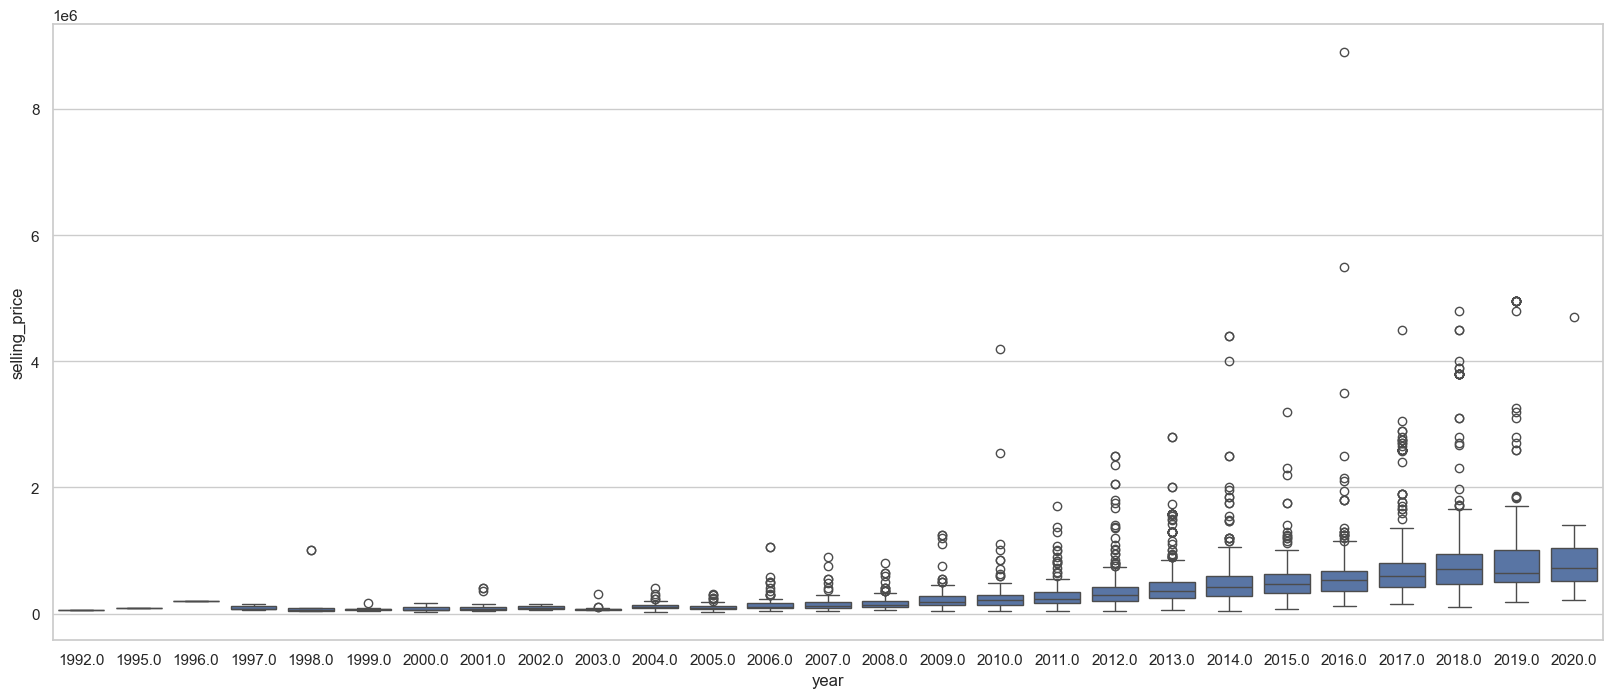

In [ ]:
# Year and selling price
plt.figure(figsize=(20, 8))
sns.boxplot(x=fixed_df['year'], y=fixed_df['selling_price'])

<Axes: xlabel='seller_type', ylabel='selling_price'>

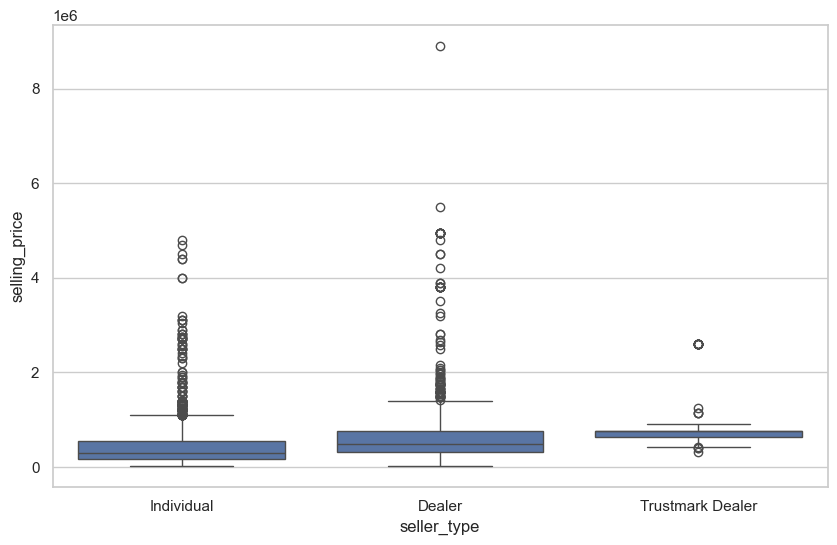

In [ ]:
# Seller type and selling price
plt.figure(figsize=(10, 6))
sns.boxplot(x=fixed_df['seller_type'], y=fixed_df['selling_price'])


<Axes: xlabel='transmission', ylabel='selling_price'>

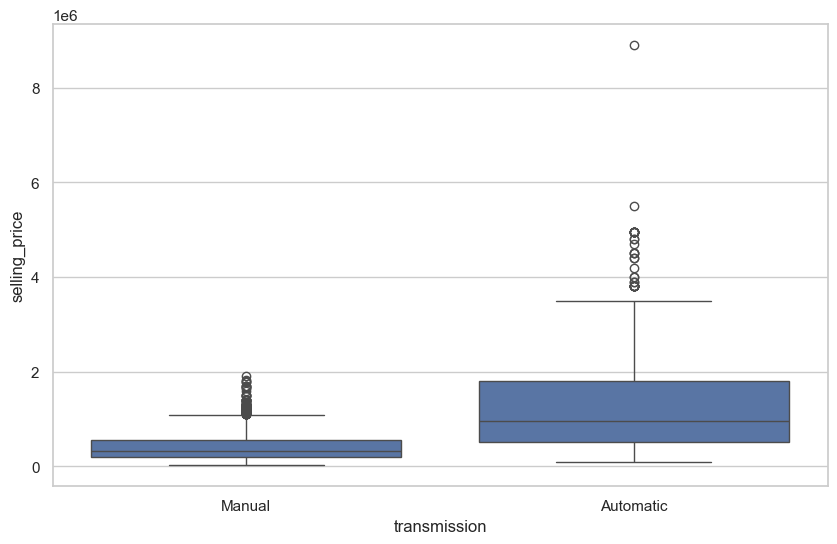

In [ ]:
# Transmission and selling price
plt.figure(figsize=(10, 6))
sns.boxplot(x=fixed_df['transmission'], y=fixed_df['selling_price'])

<Axes: xlabel='owner', ylabel='selling_price'>

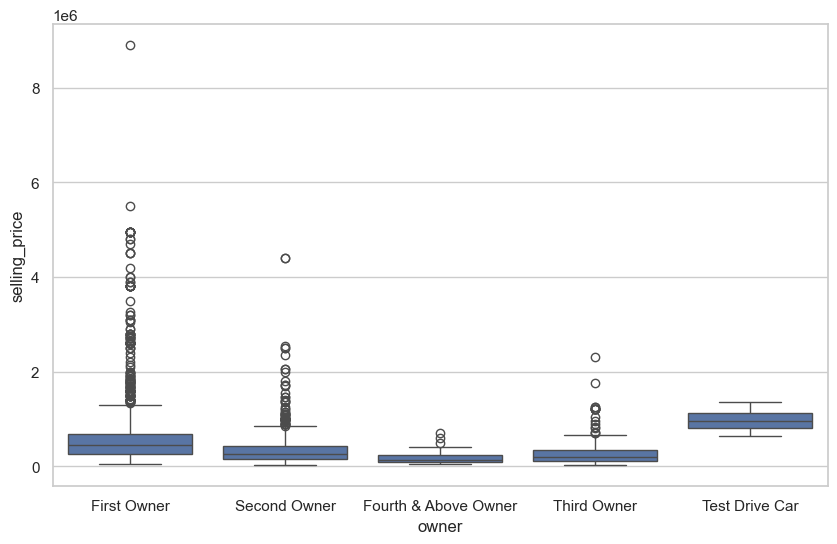

In [ ]:
# Owner and selling price  
plt.figure(figsize=(10, 6))
sns.boxplot(x=fixed_df['owner'], y=fixed_df['selling_price'])

## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [ ]:
# Only keeping first, second, and third owner

# Removing the rows with owner values that are not first, second, or third
fixed_df = fixed_df[fixed_df['owner'].isin(['First Owner', 'Second Owner', 'Third Owner'])]
petrol_clean_df = fixed_df[fixed_df['fuel'].isin(['Petrol', 'Diesel'])]
final_cleaned_df = petrol_clean_df[petrol_clean_df['seller_type'].isin(['Individual', 'Dealer'])]
print("This is the length of the data after removing data", len(fixed_df))
print(len(petrol_clean_df))
print(len(final_cleaned_df))

This is the length of the data after removing data 3945
3751
3657
